# PROJECT PROPOSAL


## Group Members

- David Khachatryan
- Jiahua Pan
- Hengrui Li
- Jerry Wu
- Dongyang Leng


## PROBLEM DESCRIPTION

This project will use an image dataset to train a model to classify food images. The dataset contains images of food items and their labels. The model will be trained to classify the images based on the labels.

**The question we want to answer**

How does the image quality impact the performance of the model?


The data come from
https://www.kaggle.com/datasets/trolukovich/food11-image-dataset?resource=download
which contains 16643 food images grouped in 11 major food categories: bread, dairy product, dessert, egg, fried food, meat, noodles-pasta, rice, seafood, soup, vegetable-fruit. The task is to classify the evaluation set into each category.

Some pictures are corrupted. We do not read them. The pictures are rgb. We read them into gray pictures. The pictures are of different pixel size. We resize them to 64*64 temporarily. All the preprocessings are done with skimage package. The raw data include 9645 training, 3384 validation, 3305 evaluation records, which are read into numpy arrays of size (9645, 64*64), (3384, 64*64), (3305, 64*64).

To lower the difficulty, we will start from two-class classification. Probably we will select two categories with the most data points. The given data is not enough for training directly. We will first create more training data by rotating, reflecting the pictures, etc. We may use skimage.feature.hog to extract gradient feature. Then we will try the different classifiers in class on the training set to see the accuracy and optimize the result by model selection.


## VARIABLES AND METHODS


We will be using Grid Search to find the best parameters for our model. The grid search will perform SVMs with different kernels and different values of C. We will benchmark the performance against Stochastic Gradient Descent.


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.feature import hog
from skimage.transform import resize
import warnings
warnings.filterwarnings("error", category=UserWarning)

# import SGD classifier

# import standard scalar transformer


In [3]:
y_train = []
X_train = []

i = 0
for i, target in enumerate(os.listdir('archive/training/')):
    for pic in os.listdir('archive/training/'+target):
        try:
            X_train.append(
                resize(imread('archive/training/'+target+'/'+pic), (64, 64)))
            y_train.append(i)
            print(f'running {target} in training')
        except:
            pass

X_train = np.array(X_train)
y_train = np.array(y_train)
y_valid = []
X_valid = []
for i, target in enumerate(os.listdir('archive/validation/')):
    for pic in os.listdir('archive/validation/'+target):
        try:
            X_valid.append(
                resize(imread('archive/validation/'+target+'/'+pic), (64, 64)))
            y_valid.append(i)
            print(f'running {target} in valid')

        except:
            pass

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
y_test = []
X_test = []
for i, target in enumerate(os.listdir('archive/evaluation/')):
    for pic in os.listdir('archive/evaluation/'+target):
        try:
            X_test.append(
                resize(imread('archive/evaluation/'+target+'/'+pic), (64, 64)))
            y_test.append(i)
            print(f'running {target} in eval')
        except:
            pass

X_test = np.array(X_test)
y_test = np.array(y_test)


running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodle

In [117]:
y_train = []
X_train = []

i = 0
for i, target in enumerate(os.listdir('archive/training/')):
    for pic in os.listdir('archive/training/'+target):
        try:
            X_train.append(
                resize(imread('archive/training/'+target+'/'+pic), (256, 256)))
            y_train.append(i)
            print(f'running {target} in training')
        except:
            pass

X_train = np.array(X_train)
y_train = np.array(y_train)
y_valid = []
X_valid = []
for i, target in enumerate(os.listdir('archive/validation/')):
    for pic in os.listdir('archive/validation/'+target):
        try:
            X_valid.append(
                resize(imread('archive/validation/'+target+'/'+pic), (256, 256)))
            y_valid.append(i)
            print(f'running {target} in valid')

        except:
            pass

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
y_test = []
X_test = []
for i, target in enumerate(os.listdir('archive/evaluation/')):
    for pic in os.listdir('archive/evaluation/'+target):
        try:
            X_test.append(
                resize(imread('archive/evaluation/'+target+'/'+pic), (256, 256)))
            y_test.append(i)
            print(f'running {target} in eval')
        except:
            pass

X_test = np.array(X_test)
y_test = np.array(y_test)


running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodles-Pasta in training
running Noodle

In [75]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape


((9644, 128, 128, 3),
 (9644,),
 (3384, 128, 128, 3),
 (3384,),
 (3305, 128, 128, 3),
 (3305,))

In [ ]:
def plot_histogram():
    plt.title('Food Category Frequency')

    plt.hist(y_train)

    # map the x value from 1 to 9 to a label
    labels = ['Bread', 'Dairy', 'Dessert', 'Egg', 'Fried Food', 'Meat',
              'Noodles', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']

    # map the label to a color
    new_y_trains = np.array([labels[i] for i in y_train])

    # plot the histogram
    plt.hist(new_y_trains, color='green')

    # add x label
    plt.xlabel('Category')

    # rotate the x label
    plt.xticks(rotation=90)

    plt.show()


##### This histogram represents our training data. It shows that some of the categories are not very representative of the food items. For example, the histogram shows that there are many images of food items that are not labeled as "vegetable-fruit". However, the "fried food" category is less represented. This is a potential issue that we should address.


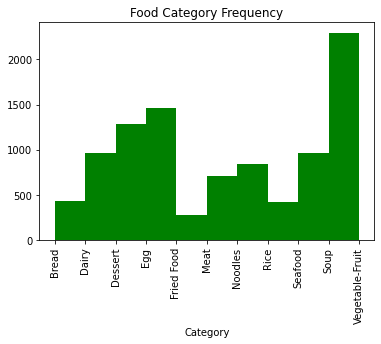

In [ ]:
plot_histogram()


# Checking the hog feature


In [53]:
gray_image = imread('archive/training/Bread/0.jpg', as_gray=True)
original_image = imread('archive/training/Bread/0.jpg')
small_pixels = resize(original_image, (64, 64))
arr_hog, arr_hog_im = hog(small_pixels, pixels_per_cell=(8, 8), cells_per_block=(
    4, 4), orientations=8, visualize=True, block_norm='L2-Hys', channel_axis=2)


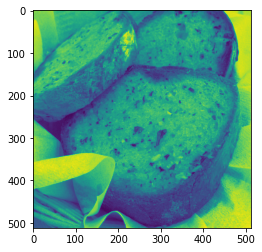

In [54]:
plt.imshow(gray_image)


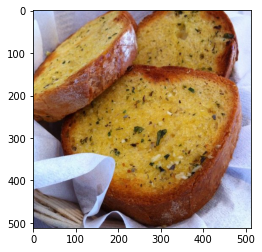

In [50]:
plt.imshow(original_image)


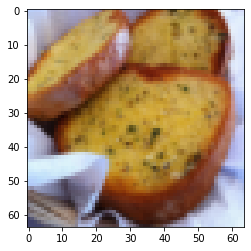

In [51]:
plt.imshow(small_pixels)


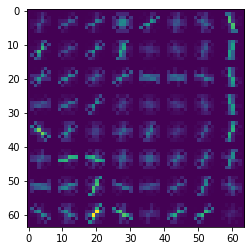

In [55]:
plt.imshow(arr_hog_im)


## DESCRIPTION


We will train the model using the [training dataset](https://github.com/KhachDavid/food-classifier/tree/main/training)

We will test the model using a confusion matrix and we will use [this dataset](https://github.com/KhachDavid/food-classifier/tree/main/evaluation)

We will validate the model using the [validation dataset](https://github.com/KhachDavid/food-classifier/tree/main/validation)


# SETUP TRAINING


In [119]:
from GreyifyHogify import RGB2GrayTransformer, HogTransformer

grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(8, 8),
    cells_per_block=(4, 4),
    orientations=8,
    block_norm='L2-Hys',
)

scalify = StandardScaler()


def setup_training(X_train):
    X_train_gray = grayify.fit_transform(X_train)
    # hogify all the grey images in a loop
    X_train_hog = []
    for i in range(len(X_train_gray)):
        X_train_hog.append(hog(X_train_gray[i], pixels_per_cell=(14, 14), cells_per_block=(
            4, 4), orientations=8, block_norm='L2-Hys'))

    # scale the hog features
    X_train_prepared = scalify.fit_transform(X_train_hog)

    return X_train_prepared


# TRAINING


### SGD classifier


In [96]:
def sgd_2000(X_train_prepared):
    print(X_train_prepared.shape)
    print('running sgd 2000')
    sgd_clf = SGDClassifier(random_state=1, max_iter=2000, tol=1e-3, dual=False)
    sgd_clf.fit(X_train_prepared, y_train)
    print('done')
    return sgd_clf


### SVM classifier with different kernels


In [97]:
# train using svm
from sklearn.svm import SVC

def svm_1000_rbf(X_train_prepared):
    svm_clf = SVC(C=1000, kernel='rbf', gamma=0.001, random_state=1)
    svm_clf.fit(X_train_prepared, y_train)
    return svm_clf


# TESTING


In [98]:
def setup_testing(X_test):
    X_test_gray = grayify.transform(X_test)
    X_test_hog = hogify.transform(X_test_gray)
    X_test_prepared = scalify.transform(X_test_hog)
    return X_test_prepared


In [100]:
def measure_accuracy(model, test_data, model_name):
    print("Measuring the accuracy for " + model_name)
    y_pred = model.predict(test_data)
    print(np.array(y_pred == y_test)[:1])
    print('')
    print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

    print(len(y_pred))

    print(" test")
    print(len(y_test))

## Example


#### SVM with the C value of 1000, and kernel=rbf. Training with 128x128 images.

In [120]:
training_data = X_train
test_data = X_test

training_data = setup_training(training_data)
sgd_clf = svm_1000_rbf(training_data)
test_data = setup_training(test_data)
measure_accuracy(sgd_clf, test_data, 'SVM, C=1000, rbf')


Measuring the accuracy for SVM, C=1000, rbf
[False]

Percentage correct:  20.332829046898638
3305
 test
3305


In [86]:
# deep copy the data
import copy as cp
 
# deep copy the data
X_train_copy = cp.deepcopy(X_train)
X_valid_copy = cp.deepcopy(X_valid)
X_test_copy = cp.deepcopy(X_test)


In [110]:
# decreasing loop from 127 to 1
for i in range(127, 58, -3):
    this_train = []
    print(f'running {i} in train')
    for image in X_train_copy:
        this_train.append(resize(image, (i, i)))

    this_test = []
    print(f'running {i} in test')
    for image in X_test_copy:
        this_test.append(resize(image, (i, i)))

    training_data = setup_training(this_train)
    svm_clf = svm_1000_rbf(training_data)
    test_data = setup_training(this_test)
    acc = measure_accuracy(svm_clf, test_data, 'SVM, C=1000, rbf')

    # write the acc number to a file
    with open('svm_1000_rbf.txt', 'a') as f:
        f.write(str(i) + 'x' + str(i) + ', ' + str(acc) + '\n')

    # close the file
    f.close()
    

running 55 in train
running 55 in test


ValueError: Found array with 0 feature(s) (shape=(9644, 0)) while a minimum of 1 is required.

### RESULTS

In [111]:
results = {
    (127, 32.708),
    (124, 37.216),
    (121, 37.634),
    (118, 37.973),
    (115, 37.700),
    (112, 37.882),
    (109, 40.968),
    (106, 41.089),
    (103, 40.998),
    (100, 42.209),
    (97, 41.301),
    (94, 42.027),
    (91, 41.997),
    (88, 41.936),
    (85, 42.421),
    (82, 39.274),
    (79, 40.877),
    (76, 39.818),
    (73, 39.304),
    (70, 38.578),
    (67, 35.098),
    (64, 35.310),
    (61, 35.310),
    (58, 35.461),
}

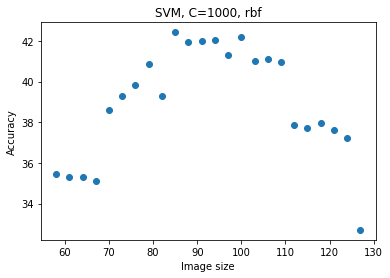

In [116]:
# plot the results
x = [i[0] for i in results]
y = [i[1] for i in results]
plt.scatter(x, y)
plt.xlabel('Image size')
plt.ylabel('Accuracy')
plt.title('SVM, C=1000, rbf')
# save image with label
plt.savefig('svm_1000_rbf.png')
plt.show()